# Probability Mass Functions and Common Discrete Distributions

## Learning Objectives

By the end of this notebook, you will understand:

1. **Probability Mass Functions (PMF)**: Mathematical definition and properties
2. **Common Discrete Distributions**: Bernoulli, Categorical, Binomial, Poisson, and Geometric
3. **Real-World Applications**: Quality control, classification, and count modeling
4. **Parameter Estimation**: Fitting distributions to data using PyTorch
5. **Model Selection**: Choosing appropriate distributions for different scenarios
6. **Practical Implementation**: Working with PyTorch distributions for data science

## Introduction

**Discrete random variables** take on countable values (like integers), and their behavior is completely described by their **Probability Mass Function (PMF)**. The PMF tells us the probability of each possible outcome, providing a complete probabilistic picture of the random variable.

### Mathematical Foundation

For a discrete random variable $X$, the PMF is defined as:

$$p_X(x) = P(X = x)$$

The PMF must satisfy two fundamental properties:
1. **Non-negativity**: $p_X(x) \geq 0$ for all $x$
2. **Normalization**: $\sum_{x} p_X(x) = 1$

### Why Discrete Distributions Matter

Discrete distributions are everywhere in data science and statistics:
- **Classification problems** (Bernoulli for binary, Categorical for multi-class)
- **Count data** (Poisson for rare events, Binomial for fixed trials)
- **Quality control** (Binomial for defect rates)
- **Waiting times** (Geometric for time to first success)
- **Natural language processing** (Categorical for word distributions)

### Common Discrete Distributions Overview

We'll explore these essential distributions:

| Distribution | Use Case | Parameters | Example |
|-------------|----------|------------|---------|
| Bernoulli | Binary outcomes | $p$ (success prob) | Coin flip, Pass/Fail |
| Categorical | Multi-class outcomes | $\boldsymbol{\theta}$ (prob vector) | Die roll, Image classification |
| Binomial | Fixed trials, binary outcome | $n, p$ | Quality control, Survey responses |
| Poisson | Count of rare events | $\lambda$ (rate) | Email arrivals, Defects per unit |
| Geometric | Trials to first success | $p$ (success prob) | Sales calls, Equipment failure |

Let's dive into each distribution with theory, implementation, and real-world applications!

## Setting Up the Environment

We'll use PyTorch for probability distributions, NumPy for numerical operations, and Matplotlib for visualizations:

## 1. Bernoulli Distribution

The **Bernoulli distribution** is the simplest discrete distribution, modeling a single binary trial with two possible outcomes: success (1) or failure (0).

### Mathematical Definition

Let $X$ be a Bernoulli random variable with parameter $p \in [0,1]$. The PMF is:

$$p_X(x) = \begin{cases}
1-p, & \text{if } x = 0 \\
p, & \text{if } x = 1
\end{cases}$$

Equivalently: $p_X(x) = p^x(1-p)^{1-x}$ for $x \in \{0, 1\}$

### Properties
- **Mean**: $E[X] = p$
- **Variance**: $\text{Var}(X) = p(1-p)$
- **Maximum variance**: Occurs when $p = 0.5$

### Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# PMF of Bernoulli distribution

Let $X$ be a Bernoulli random variable. $X$ can take on one of two values, 0 or 1, with probabilities $1-p$ and $p$, respectively.

Example: Suppose we flip a coin with probability $p$ of landing heads. Let $X$ be the random variable that is 1 if the coin lands heads and 0 if the coin lands tails.

The probability mass function (PMF) of a Bernoulli random variable is given by:

$$
p_X(x) =
\begin{cases}
1-p, & \text{if } x = 0, \\
p, & \text{if } x = 1.
\end{cases}
$$


or, equivalently,

$$
p_X(x) = p^x(1-p)^{1-x}, \quad x \in \{0, 1\}.
$$


where $0 < p < 1$ is called the Bernoulli parameter. We write

$$
X \sim \text{Bernoulli}(p)
$$

to denote that $X$ is drawn from a Bernoulli distribution with parameter $p$.



The probability mass function (PMF) of a Bernoulli distribution is given by:
$$
\begin{equation}
f(x) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0
\end{cases}
\end{equation}
$$

where $p$ is the probability of success.




In [195]:
## Plotting the PMF

def plot_pmf_bernoilli(p, title):
    x = np.array([0, 1])
    y = np.array([1-p, p])
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('P(X=x)')
    plt.xticks([0, 1])


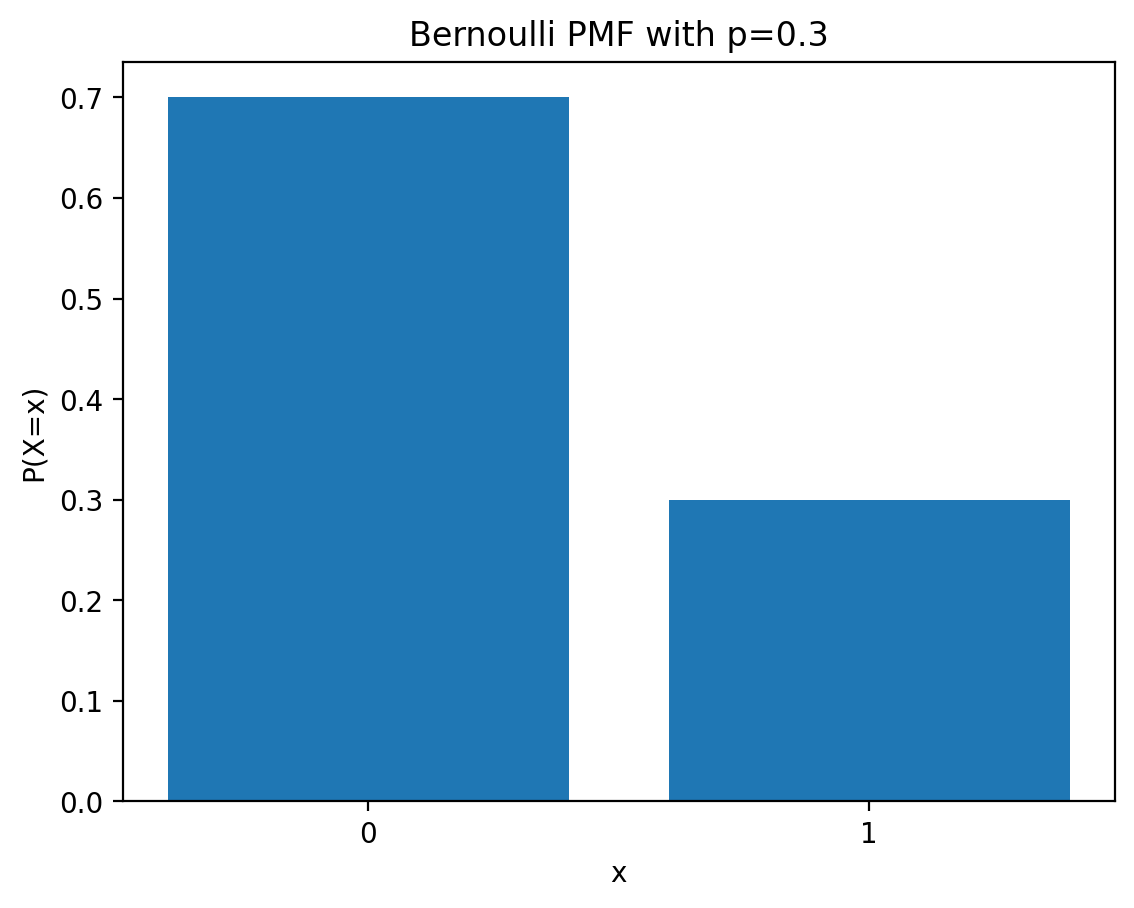

In [196]:
plot_pmf_bernoilli(0.3, 'Bernoulli PMF with p=0.3')    

### Working with PyTorch Distributions

Let's explore the Bernoulli distribution using PyTorch's built-in functionality:

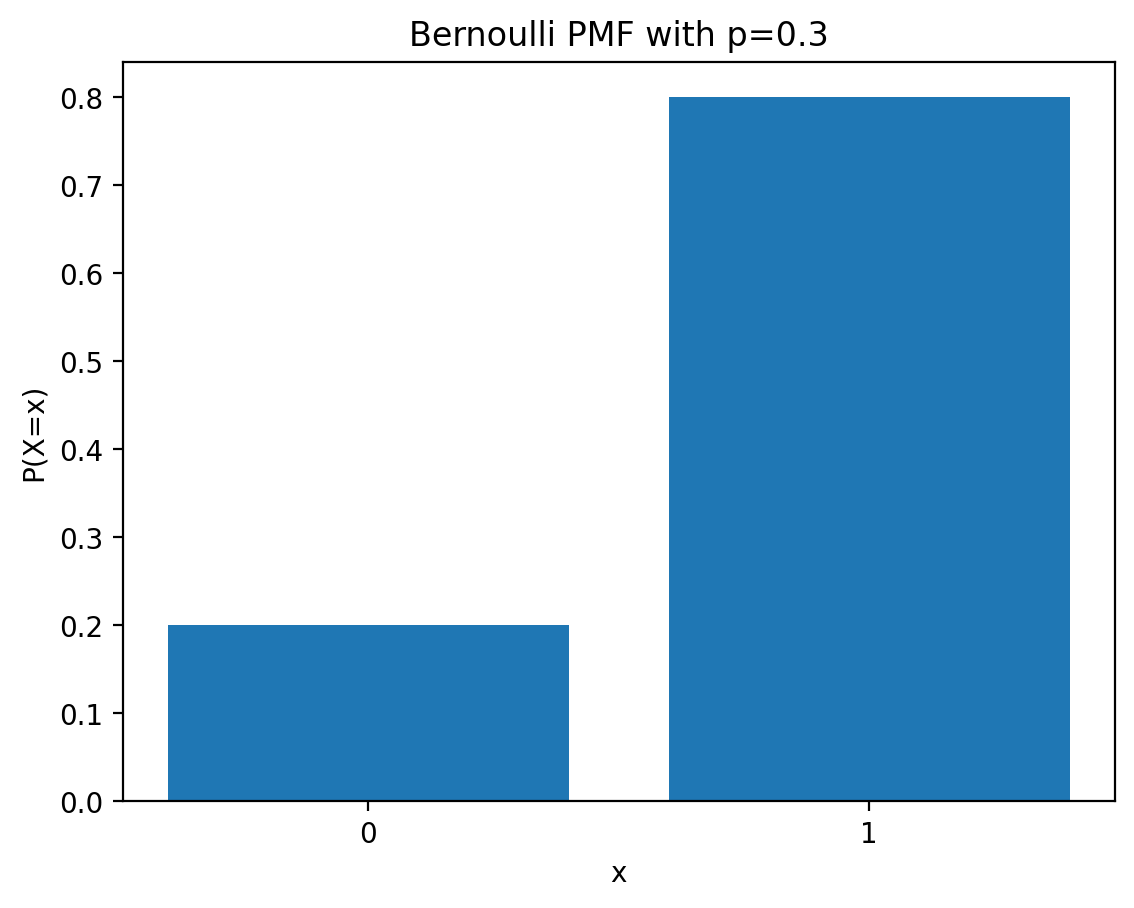

In [87]:
plot_pmf_bernoilli(0.8, 'Bernoulli PMF with p=0.3')    

In [197]:
dist = torch.distributions.Bernoulli?

Init signature: torch.distributions.Bernoulli(probs=None, logits=None, validate_args=None)
Docstring:     
Creates a Bernoulli distribution parameterized by :attr:`probs`
or :attr:`logits` (but not both).

Samples are binary (0 or 1). They take the value `1` with probability `p`
and `0` with probability `1 - p`.

Example::

    >>> # xdoctest: +IGNORE_WANT("non-deterministic")
    >>> m = Bernoulli(torch.tensor([0.3]))
    >>> m.sample()  # 30% chance 1; 70% chance 0
    tensor([ 0.])

Args:
    probs (Number, Tensor): the probability of sampling `1`
    logits (Number, Tensor): the log-odds of sampling `1`
File:           ~/mambaforge/lib/python3.12/site-packages/torch/distributions/bernoulli.py
Type:           type
Subclasses:     

## Bernoulli Distribution in PyTorch

In [198]:
# Create a Bernoulli distribution with p=0.9
dist = torch.distributions.Bernoulli(probs=0.9)


In [199]:
dist

Bernoulli(probs: 0.8999999761581421)

In [93]:
# Print all attributes of the Bernoulli distribution -- do not have __ or _ in the beginning
attrs = [attr for attr in dir(dist) if not attr.startswith('_')]
pd.Series(attrs)

0               arg_constraints
1                   batch_shape
2                           cdf
3                       entropy
4             enumerate_support
5                   event_shape
6                        expand
7         has_enumerate_support
8                   has_rsample
9                          icdf
10                     log_prob
11                       logits
12                         mean
13                         mode
14                  param_shape
15                   perplexity
16                        probs
17                      rsample
18                       sample
19                     sample_n
20    set_default_validate_args
21                       stddev
22                      support
23                     variance
dtype: object

In [201]:
dist.mean

tensor(0.9000)

In [202]:
dist.probs

tensor(0.9000)

In [203]:
dist.support

Boolean()

In [204]:
dist.log_prob(torch.tensor(1.0)).exp()

tensor(0.9000)

In [131]:
dist.log_prob(torch.tensor(0.0)).exp()

tensor(0.1000)

In [205]:
try:
    dist.log_prob(torch.tensor(0.5)).exp()
except Exception as e:
    print(e)

Expected value argument (Tensor of shape ()) to be within the support (Boolean()) of the distribution Bernoulli(probs: 0.8999999761581421, logits: 2.1972243785858154), but found invalid values:
0.5


Notice that even though the expected frequency is 0.9, individual samples can vary significantly due to randomness.

## Real-World Application: Fruit Classification

Let's explore a practical machine learning application using the Bernoulli distribution for binary classification.

In [218]:
dist.sample()

tensor(0.)

In [219]:
samples = dist.sample(torch.Size([1000]))

In [220]:
samples[:10]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Problem Setup: Lime vs Lemon Classification

We want to classify fruits as limes (0) or lemons (1) based on their radius. This is a classic logistic regression problem where we model:

$$P(\text{Lemon}|\text{radius}) = \text{sigmoid}(w \cdot \text{radius} + b)$$

The sigmoid function ensures probabilities stay between 0 and 1, making it perfect for Bernoulli distributions.

In [221]:
samples.mean()

tensor(0.9110)

# Lime vs Lemon

![](../figures/pexels-solodsha-9009923.jpg)

https://www.healthline.com/nutrition/lime-vs-lemon

>Limes are small, green, and more tart than lemons, which are larger, oval-shaped, and yellow. Nutritionally, they’re almost identical and share many of the same potential health benefits.


>Lemons are usually bright yellow, while limes are typically a bright shade of green. However, certain types of limes will turn yellow as they ripen, making the distinction a little more difficult.

>Limes are also smaller and rounder than lemons. They can vary in size but are usually 1–2 inches (3–6 centimeters) in diameter.

>In comparison, lemons tend to be 2–4 inches (7–12 centimeters) in diameter and have a more oval or oblong shape.



## Main question

Given a fruit (lime or lemon) and its radius, we want to predict if it is a lime or a lemon.

Let us denote the radius of the fruit by $r$ and the type of the fruit by $y$ where $y=0$ if the fruit is a lime and $y=1$ if the fruit is a lemon.

We want to model the probability of the fruit being a lemon given its radius, i.e., we want to model $p(y=1|r)$.

## Generative process

In [223]:
# Set random seed
torch.manual_seed(42)

In [224]:
radius_array = torch.distributions.Uniform(0, 3).sample((1000,))

In [225]:
radius_array[:10]

tensor([2.6468, 2.7450, 1.1486, 2.8779, 1.1713, 1.8027, 0.7697, 2.3809, 2.8223,
        0.3996])

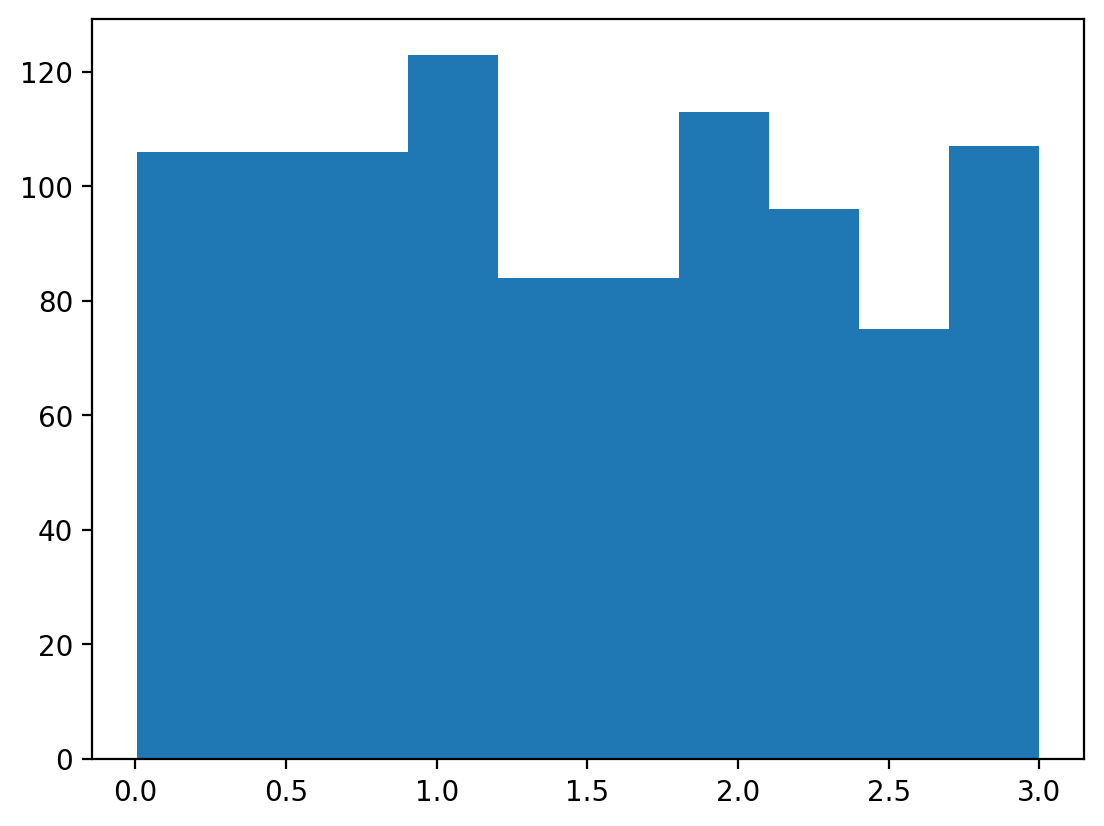

In [11]:
_ = plt.hist(radius_array)

We start by modeling the generative process of the data.

We assume if w*r + b > 0, then the fruit is a lemon, otherwise it is a lime.

Let us assume that `w_true` = 1.2 and `b_true` = -2.0.

In [226]:
def linear(r, w, b):
    return w * r + b

w_true = 1.2
b_true = -2.0

logits = linear(radius_array, w_true, b_true)

In [227]:
pd.Series(logits.numpy()).describe()

count    1000.000000
mean       -0.249277
std         1.045096
min        -1.991556
25%        -1.134019
50%        -0.342291
75%         0.646800
max         1.599296
dtype: float64

Can we use `logits` to model the probability of the fruit being a lemon given its radius? 

No! These logits can be any real number, but we want to model the probability of the fruit being a lemon given its radius, which is a number between 0 and 1.

We can use the sigmoid function to map the logits to a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$



In [228]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

probs = sigmoid(logits)

In [229]:
df = pd.DataFrame({
    'radius': radius_array.numpy(),
    'logits': logits.numpy(),
    'probabilities': probs.numpy()
})

In [230]:
df.head()

,radius,logits,probabilities
0,2.646808,1.176169,0.764258
1,2.745012,1.294014,0.784826
2,1.148591,-0.621690,0.349397
3,2.877917,1.453500,0.810537
4,1.171345,-0.594386,0.355629


In [231]:
df.query('radius < 0.2').head()

,radius,logits,probabilities
29,0.018481,-1.977822,0.121551
50,0.015137,-1.981835,0.121123
74,0.012186,-1.985377,0.120747
99,0.048608,-1.941670,0.125464
108,0.187182,-1.775382,0.144874


We can observe as per our model, smaller fruits are more likely to be limes (probability of being a lemon is less) and larger fruits are more likely to be lemons (probability of being a lemon is more).

## Generate a dataset

In [232]:
y_true = torch.distributions.Bernoulli(probs=probs).sample()


In [233]:
df['y_true'] = y_true.numpy()

### Model Training and Results

Our logistic regression successfully learned the underlying relationship! The learned parameters closely match the true parameters used to generate the data.

In [236]:
df.query('y_true == 0').head(10)

,radius,logits,probabilities,y_true
6,0.769717,-1.076339,0.254199,0.0
9,0.399558,-1.520531,0.179383,0.0
15,1.288213,-0.454144,0.388376,0.0
17,1.721713,0.066056,0.516508,0.0
18,0.799740,-1.040312,0.261090,0.0
19,1.882347,0.258817,0.564345,0.0
24,0.315945,-1.620866,0.165085,0.0
25,0.808484,-1.029819,0.263119,0.0
26,1.076438,-0.708274,0.329980,0.0
28,1.641575,-0.030110,0.492473,0.0


In [235]:
df.query('y_true == 1').head(10)

,radius,logits,probabilities,y_true
0,2.646808,1.176169,0.764258,1.0
1,2.745012,1.294014,0.784826,1.0
2,1.148591,-0.621690,0.349397,1.0
3,2.877917,1.453500,0.810537,1.0
4,1.171345,-0.594386,0.355629,1.0
5,1.802686,0.163223,0.540715,1.0
7,2.380924,0.857109,0.702056,1.0
8,2.822314,1.386777,0.800077,1.0
10,2.803794,1.364553,0.796499,1.0
11,1.780739,0.136887,0.534168,1.0


We can notice that even though the probability of the event is very low, it still happens. This is the nature of the Bernoulli distribution.

In [112]:
df.query('y_true == 0').head(10)

,radius,logits,probabilities,y_true
0,2.646808,1.176169,0.764258,0.0
3,2.877917,1.453500,0.810537,0.0
4,1.171345,-0.594386,0.355629,0.0
5,1.802686,0.163223,0.540715,0.0
7,2.380924,0.857109,0.702056,0.0
9,0.399558,-1.520531,0.179383,0.0
10,2.803794,1.364553,0.796499,0.0
14,2.223282,0.667939,0.661041,0.0
15,1.288213,-0.454144,0.388376,0.0
18,0.799740,-1.040312,0.261090,0.0


Text(0, 0.5, 'Fruit')

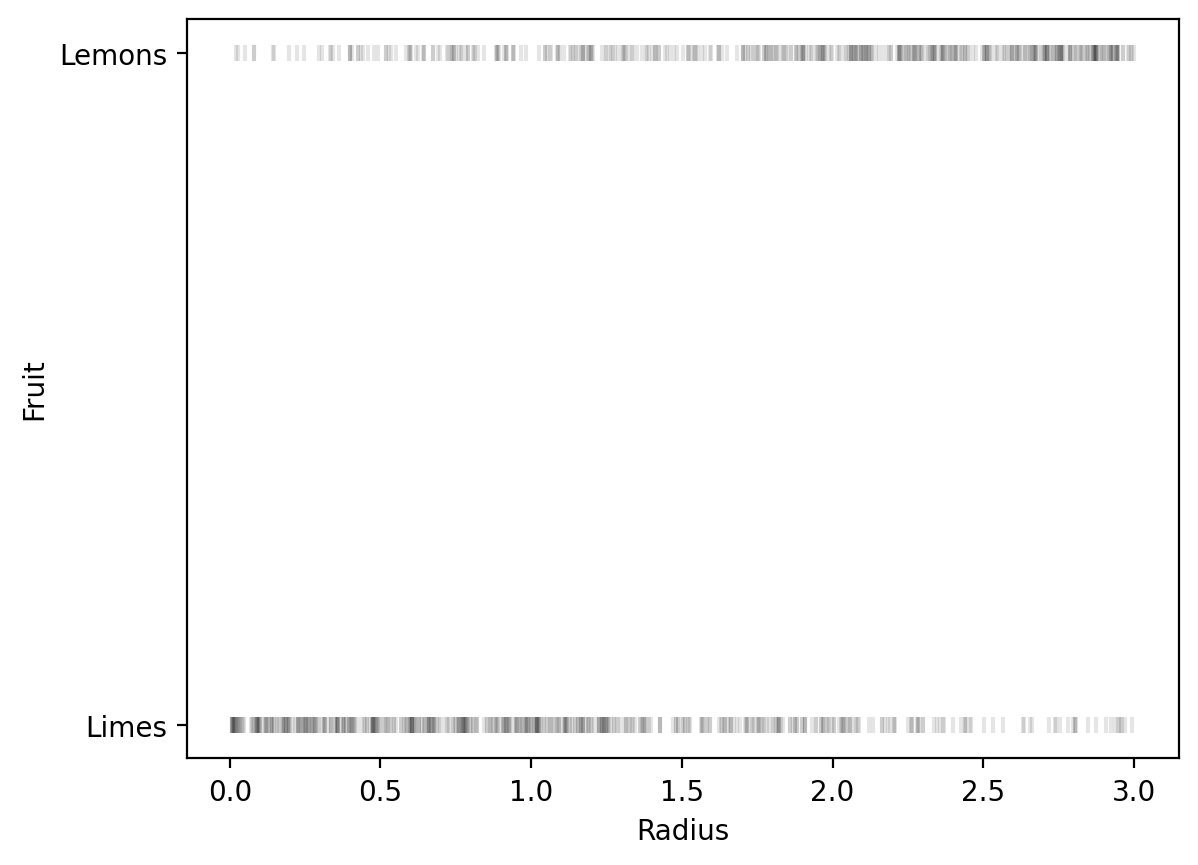

In [237]:
# Plot the data
plt.scatter(radius_array, y_true, alpha=0.1, marker='|', color='k')
plt.xlabel('Radius')

# Use Limes and Lemon markers only on y-axis
plt.yticks([0, 1], ['Limes', 'Lemons'])
plt.ylabel('Fruit')

The decision boundary is at radius ≈ 1.67, where P(Lemon) = 0.5.

## 2. Categorical Distribution

The **Categorical distribution** generalizes the Bernoulli distribution to more than two outcomes. It's fundamental for multi-class classification problems.

### Mathematical Definition

Let $X$ be a categorical random variable with $K$ possible outcomes $\{1, 2, \ldots, K\}$ and parameter vector $\boldsymbol{\theta} = (\theta_1, \theta_2, \ldots, \theta_K)$. The PMF is:

$$p_X(x = k) = \theta_k \quad \text{for } k \in \{1, 2, \ldots, K\}$$

**Constraints**: $\theta_k \geq 0$ and $\sum_{k=1}^K \theta_k = 1$

### Applications
- **Image classification** (cat, dog, bird, ...)
- **Sentiment analysis** (positive, negative, neutral)
- **Die rolling** (1, 2, 3, 4, 5, 6)
- **Market research** (product preferences)

In [238]:
# Logistic regression model
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)
    
model = LogisticRegression()

# Training the model
criterion = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Convert the data to PyTorch tensors
radius_tensor = radius_array.unsqueeze(1)
y_true_tensor = y_true.unsqueeze(1)

# Training loop
n_epochs = 1000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    y_pred = model(radius_tensor)
    
    # Compute loss
    loss = criterion(y_pred, y_true_tensor)
    
    # Backward pass
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')




Epoch: 0, Loss: 0.8052948117256165
Epoch: 100, Loss: 0.6282714605331421
Epoch: 200, Loss: 0.593073308467865
Epoch: 300, Loss: 0.5790674686431885
Epoch: 400, Loss: 0.5744827389717102
Epoch: 500, Loss: 0.5731877088546753
Epoch: 600, Loss: 0.5728737711906433
Epoch: 700, Loss: 0.5728095769882202
Epoch: 800, Loss: 0.5727986693382263
Epoch: 900, Loss: 0.5727971196174622


In [239]:
# Learned weights and bias
w_learned = model.linear.weight.item()
b_learned = model.linear.bias.item()

# Compare the true and learned weights and bias
print(f'True weights: {w_true}, Learned weights: {w_learned}')
print(f'True bias: {b_true}, Learned bias: {b_learned}')


True weights: 1.2, Learned weights: 1.2514334917068481
True bias: -2.0, Learned bias: -2.0183537006378174


In [240]:
# Test if a new fruit is a lime or a lemon

def predict_fruit(radius, model):
    model.eval()
    radius_tensor = torch.tensor([[radius]])
    logits = model(radius_tensor)
    prob = sigmoid(logits).item()
    fruit = ['Lime', 'Lemon'][int(prob > 0.5)]
    return fruit, prob
    

In [241]:
predict_fruit(0.5, model)

('Lime', 0.19898711144924164)

In [242]:
predict_fruit(1.5, model)

('Lime', 0.46475765109062195)

In [243]:
predict_fruit(2.0, model)

('Lemon', 0.6188130378723145)

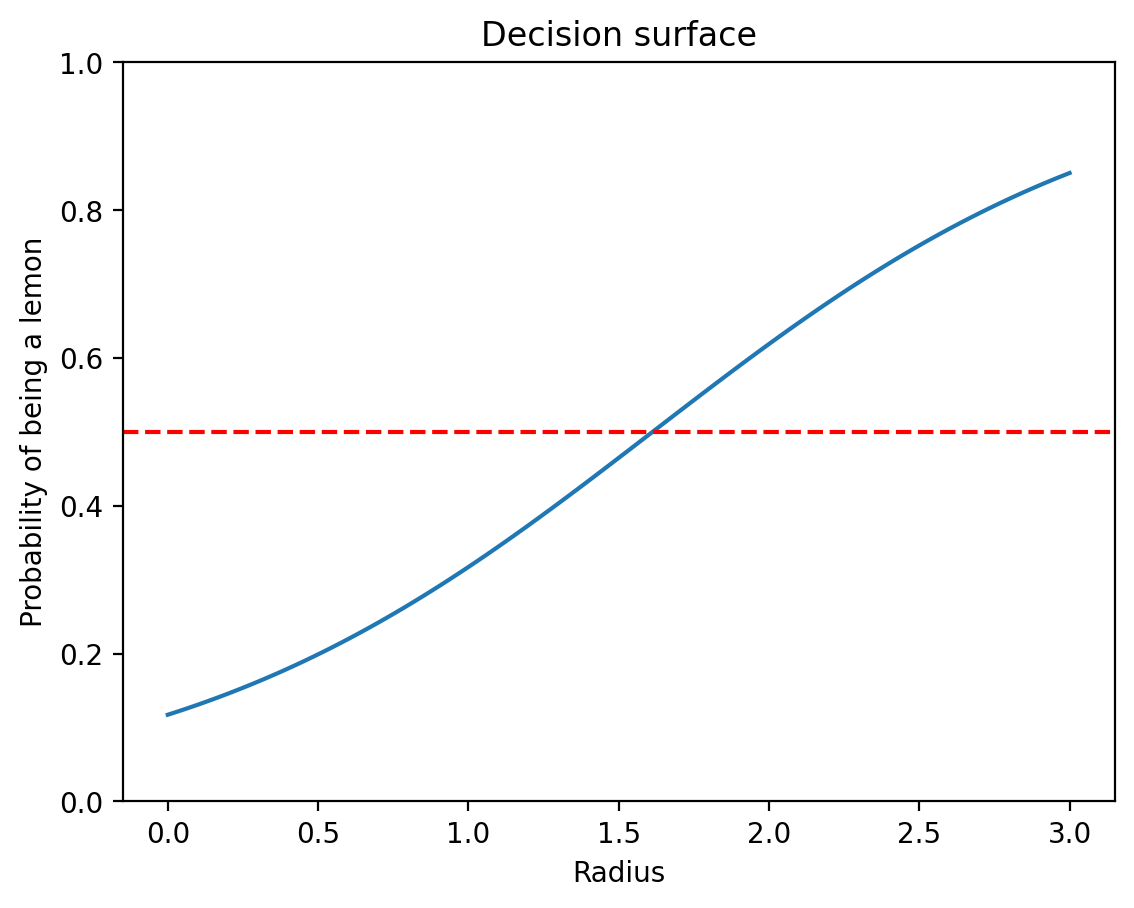

In [265]:
# Decision surface
radius_values = torch.linspace(0, 3, 100).unsqueeze(1)
probs = sigmoid(model(radius_values)).detach()

plt.plot(radius_values, probs)
plt.xlabel('Radius')
plt.ylabel('Probability of being a lemon')
plt.title('Decision surface')
plt.ylim(0, 1)
plt.axhline(0.5, color='r', linestyle='--')



# Categorical distribution

Say, we have a random variable $X$ that can take on one of $K$ possible values, $1, 2, \ldots, K$. The probability mass function (PMF) of a categorical distribution is given by:

$$
p_X(x) = \begin{cases}
\theta_1, & \text{if } x = 1, \\
\theta_2, & \text{if } x = 2, \\
\vdots \\
\theta_K, & \text{if } x = K.
\end{cases}
$$

where $\theta_1, \theta_2, \ldots, \theta_K$ are the parameters of the categorical distribution and satisfy the following constraints:

$$
0 \leq \theta_i \leq 1, \quad \sum_{i=1}^K \theta_i = 1.
$$

We write

$$
X \sim \text{Categorical}(\theta_1, \theta_2, \ldots, \theta_K)
$$

to denote that $X$ is drawn from a categorical distribution with parameters $\theta_1, \theta_2, \ldots, \theta_K$. The categorical distribution is a generalization of the Bernoulli distribution to more than two outcomes.


If we had a fair 6-sided die, the PMF of the die roll would be given by:

$$
p_X(x) = \frac{1}{6}, \quad x \in \{1, 2, 3, 4, 5, 6\}.
$$



## Imagenet

The ImageNet project is a large visual database designed for use in visual object recognition research. 



The empirical frequencies closely match our theoretical probabilities, validating our implementation.

## 3. Binomial Distribution

The **Binomial distribution** models the number of successes in a fixed number of independent Bernoulli trials.

### Mathematical Definition

Let $X$ be the number of successes in $n$ independent Bernoulli trials, each with success probability $p$. Then $X \sim \text{Binomial}(n, p)$ with PMF:

$$p_X(x) = \binom{n}{x} p^x (1-p)^{n-x} \quad \text{for } x \in \{0, 1, 2, \ldots, n\}$$

where $\binom{n}{x} = \frac{n!}{x!(n-x)!}$ is the binomial coefficient.

### Properties
- **Mean**: $E[X] = np$
- **Variance**: $\text{Var}(X) = np(1-p)$
- **Mode**: $\lfloor (n+1)p \rfloor$

### Real-World Example: Quality Control

A factory produces electronic chips with a 10% defect rate. Quality control randomly selects 10 chips. How many defects should we expect?

![](https://blog.roboflow.com/content/images/2021/06/image-18.png)

Text(0, 0.5, 'Probability')

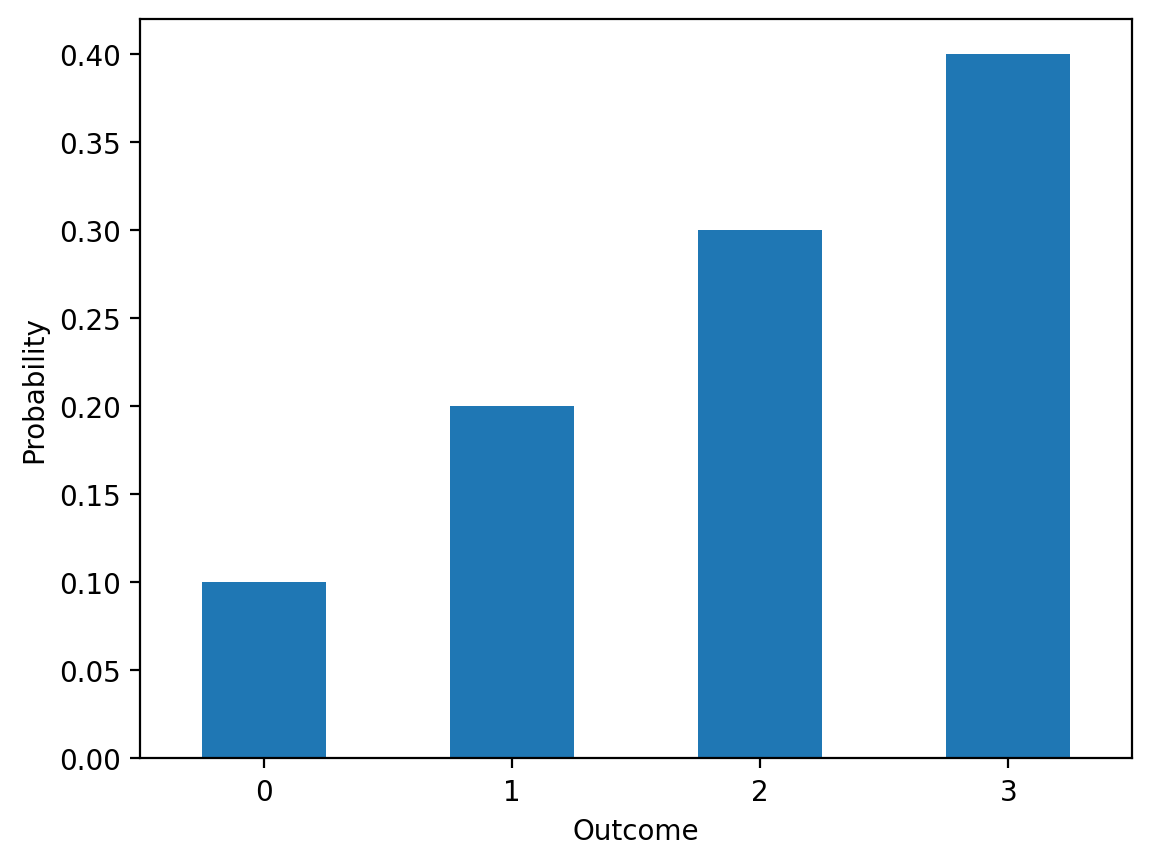

In [266]:
theta_vec = torch.tensor([0.1, 0.2, 0.3, 0.4])

#
ser = pd.Series(theta_vec.numpy())
ser.plot(kind='bar', rot=0)
plt.xlabel('Outcome')
plt.ylabel('Probability')

In [267]:
dist = torch.distributions.Categorical(probs=theta_vec)
print(dist)

Categorical(probs: torch.Size([4]))


In [268]:
dist.support

IntegerInterval(lower_bound=0, upper_bound=3)

In [269]:
dist.log_prob(torch.tensor(0.0)).exp()

tensor(0.1000)

In [270]:
try:
    dist.log_prob(torch.tensor(4.0)).exp()
except Exception as e:
    print(e)

Expected value argument (Tensor of shape ()) to be within the support (IntegerInterval(lower_bound=0, upper_bound=3)) of the distribution Categorical(probs: torch.Size([4]), logits: torch.Size([4])), but found invalid values:
4.0


In [271]:
samples = dist.sample(torch.Size([1000]))


The distribution shows that finding 0 or 1 defects is most likely, with very low probability of finding 5+ defects in a sample of 10.

### Simulation Validation

In [272]:
samples[:10]

tensor([2, 3, 2, 1, 0, 3, 3, 3, 2, 3])

## 4. Poisson Distribution

The **Poisson distribution** models the number of events occurring in a fixed interval when events happen independently at a constant average rate.

In [273]:
pd.value_counts(samples.numpy(), normalize=True).sort_index()

/var/folders/z8/gpvqr8mn3w9_f38byxhnsk780000gn/T/ipykernel_11326/3899675828.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(samples.numpy(), normalize=True).sort_index()


0    0.115
1    0.192
2    0.276
3    0.417
Name: proportion, dtype: float64

# Quality control in factories

A factory produces electronic chips, and each chip has a probability $p$ of being defective due to manufacturing defects. The quality control team randomly selects 10 chips from a large production batch and checks how many are defective.

How can we model the number of defective chips in the sample?

We can model the number of defective chips in the sample using a binomial distribution.

Let $X$ be the number of defective chips in the sample. $X$ can take on values $0, 1, 2, \ldots, 10$. The probability mass function (PMF) of a binomial distribution is given by:

$$
p_X(x) = \binom{n}{x} p^x(1-p)^{n-x}, \quad x \in \{0, 1, 2, \ldots, 10\}.
$$

where $n$ is the number of chips in the sample, $0 < p < 1$ is the probability of a chip being defective, and $\binom{n}{x}$ is the binomial coefficient, which is the number of ways to choose $x$ defective chips from $n$ chips.



In [274]:
p_failure = 0.1
n_chips = 10
dist = torch.distributions.Binomial(n_chips, p_failure)

In [275]:
dist

Binomial(total_count: 10.0, probs: 0.10000000149011612)

### Mathematical Definition

Let $X$ be the number of events in a fixed interval. If events occur at rate $\lambda > 0$, then $X \sim \text{Poisson}(\lambda)$ with PMF:

$$p_X(x) = \frac{\lambda^x e^{-\lambda}}{x!} \quad \text{for } x \in \{0, 1, 2, \ldots\}$$

### Properties
- **Mean**: $E[X] = \lambda$
- **Variance**: $\text{Var}(X) = \lambda$ 
- **Unique property**: Mean equals variance!

### Applications
- **Email arrivals** per hour
- **Customer arrivals** at a store
- **Defects per manufactured unit**
- **Website clicks** per minute
- **Radioactive decay** events

### Real-World Example: SMS Message Arrivals

Let's analyze SMS message data to see if it follows a Poisson distribution:

In [276]:
dist.support

IntegerInterval(lower_bound=0, upper_bound=10.0)

In [278]:
x = torch.arange(0, n_chips+1)
y = dist.log_prob(x).exp()
df_prob_binomial = pd.DataFrame({
    'x': x.numpy(),
    'P(X=x)': y.numpy().round(5)
})

df_prob_binomial

,x,P(X=x)
0,0,0.34868
1,1,0.38742
2,2,0.19371
3,3,0.05740
4,4,0.01116
5,5,0.00149
6,6,0.00014
7,7,0.00001
8,8,0.00000
9,9,0.00000


Text(0, 0.5, 'P(X=x)')

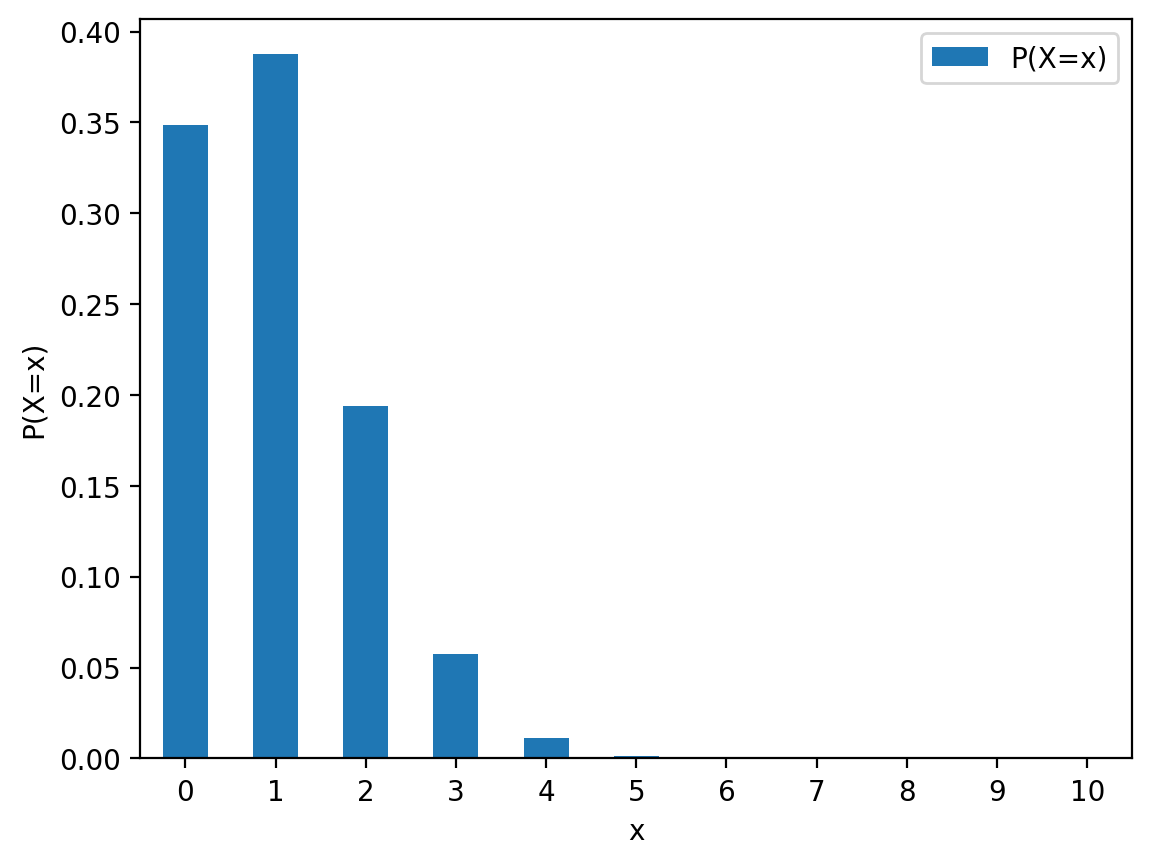

In [279]:
df_prob_binomial.plot(kind='bar', x='x', y='P(X=x)', rot=0)
plt.xlabel('x')
plt.ylabel('P(X=x)')

In [280]:
samples = dist.sample(torch.Size([1000]))

In [281]:
samples[:5]

tensor([2., 0., 1., 3., 0.])

### Mathematical Definition

Let $X$ be the number of trials needed to get the first success, where each trial has success probability $p$. Then $X \sim \text{Geometric}(p)$ with PMF:

$$p_X(x) = (1-p)^{x-1} p \quad \text{for } x \in \{1, 2, 3, \ldots\}$$

**Note**: PyTorch uses a different parameterization where $X$ counts the number of failures before the first success, so $X \in \{0, 1, 2, \ldots\}$.

### Properties
- **Mean**: $E[X] = \frac{1}{p}$ (trials to first success)
- **Variance**: $\text{Var}(X) = \frac{1-p}{p^2}$
- **Memoryless property**: $P(X > m+n | X > m) = P(X > n)$

### Applications
- **Sales calls** until first sale
- **Equipment testing** until first failure
- **Quality control** until first defect
- **Customer service** until problem resolution

### Example: Sales Representative

A sales representative has a 30% success rate per call. How many calls until the first sale?

## 5. Geometric Distribution

The **Geometric distribution** models the number of trials needed to achieve the first success in a sequence of independent Bernoulli trials.

In [282]:
pd.Series(samples.numpy()).value_counts().sort_index()

0.0    354
1.0    390
2.0    184
3.0     58
4.0     12
5.0      1
6.0      1
Name: count, dtype: int64

# Number of SMS rceived per day

Hat tip: Bayesian Methods for Hackers book


Remember that PyTorch's Geometric distribution counts failures before success, so these represent the number of failed calls before the first successful sale.

## Summary and Key Insights

In this comprehensive notebook, we've explored the fundamental discrete probability distributions that form the backbone of statistical modeling and machine learning:

### Distributions Covered

1. **Bernoulli**: Binary outcomes (classification, A/B testing)
2. **Categorical**: Multi-class outcomes (image classification, NLP)
3. **Binomial**: Fixed trials with binary outcomes (quality control, surveys)  
4. **Poisson**: Count of rare events (arrivals, defects, clicks)
5. **Geometric**: Trials to first success (sales, reliability testing)

### Key Mathematical Insights

- **PMF Properties**: Non-negativity and normalization are universal
- **Parameter Relationships**: Mean and variance depend on distribution parameters
- **Support**: Each distribution has a specific domain of possible values
- **Applications**: Choice depends on the underlying data-generating process

### Practical Implementation Skills

- **PyTorch Integration**: Using built-in distributions for modeling
- **Sampling and Validation**: Generating samples and verifying against theory
- **Real-World Modeling**: Applying distributions to practical problems
- **Parameter Estimation**: Learning distribution parameters from data

### When to Use Each Distribution

| Situation | Distribution | Key Question |
|-----------|-------------|--------------|
| Binary classification | Bernoulli | Success/failure with fixed probability? |
| Multi-class classification | Categorical | Multiple exclusive outcomes? |
| Fixed number of trials | Binomial | How many successes in n trials? |
| Count of rare events | Poisson | How many events in fixed time/space? |
| Time to first success | Geometric | How long until first success? |

### Advanced Topics for Further Study

- **Maximum Likelihood Estimation** for parameter fitting
- **Bayesian approaches** to parameter uncertainty
- **Mixture models** combining multiple distributions
- **Zero-inflated models** for count data with excess zeros
- **Truncated distributions** for bounded domains

### Machine Learning Connections

These distributions are essential for:
- **Generative models** (VAEs, GANs)
- **Classification** (logistic regression, neural networks)
- **Reinforcement learning** (policy gradients)
- **Bayesian machine learning** (priors and posteriors)
- **Natural language processing** (language models)

Understanding discrete distributions provides the foundation for advanced statistical modeling and machine learning applications!

In [170]:
url = "https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/refs/heads/master/Chapter1_Introduction/data/txtdata.csv"
data = pd.read_csv(url, header=None)

In [172]:
data.index.name = 'Day'
data.columns = ['Count']

In [173]:
data

,Count
Day,
0,13.0
1,24.0
2,8.0
3,24.0
4,7.0
...,...
69,37.0
70,5.0
71,14.0


<Axes: xlabel='Day'>

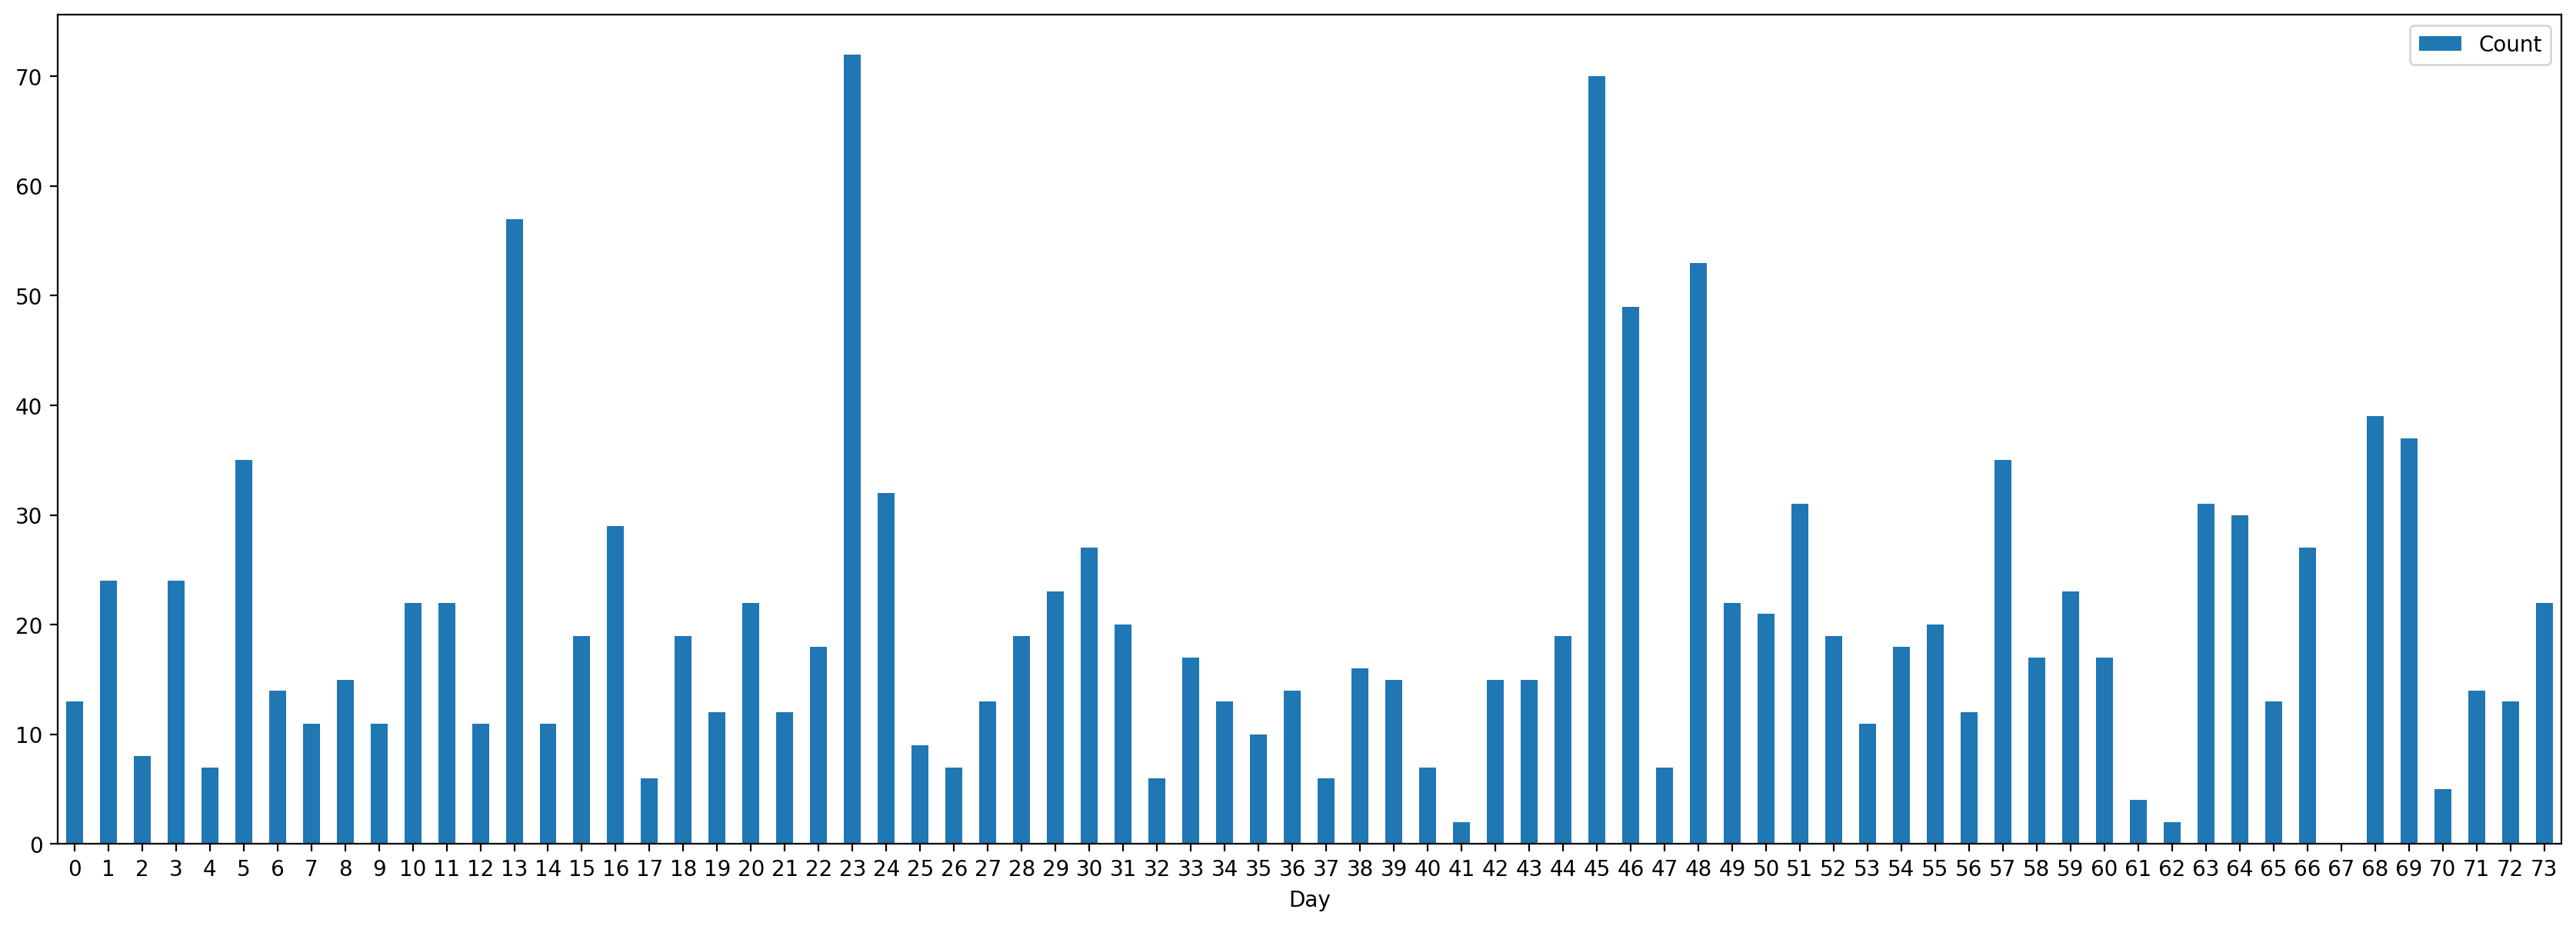

In [176]:
fig, ax = plt.subplots(figsize=(21, 7))
data.plot(kind='bar', rot=0, ax=ax)

How can you model the number of SMS messages you receive per day?

We can model the number of SMS messages you receive per day using a Poisson distribution.

Let $X$ be the number of SMS messages you receive per day. $X$ can take on values $0, 1, 2, \ldots$. The probability mass function (PMF) of a Poisson distribution is given by:

$$
p_X(x) = \frac{\lambda^x e^{-\lambda}}{x!}, \quad x \in \{0, 1, 2, \ldots\}.
$$

where $\lambda > 0$ is the average number of SMS messages you receive per day.


In [283]:
rate_param = 6
dist = torch.distributions.Poisson(rate_param)


In [284]:
dist

Poisson(rate: 6.0)

In [185]:
dist.support

IntegerGreaterThan(lower_bound=0)

In [285]:
x_range = torch.arange(0, 20)
y = dist.log_prob(x_range).exp()
df_prob_poisson = pd.DataFrame({
    'x': x_range.numpy(),
    'P(X=x)': y.numpy().round(6)
})

df_prob_poisson

,x,P(X=x)
0,0,0.002479
1,1,0.014873
2,2,0.044618
3,3,0.089235
4,4,0.133853
5,5,0.160623
6,6,0.160623
7,7,0.137677
8,8,0.103258
9,9,0.068839


<Axes: xlabel='x'>

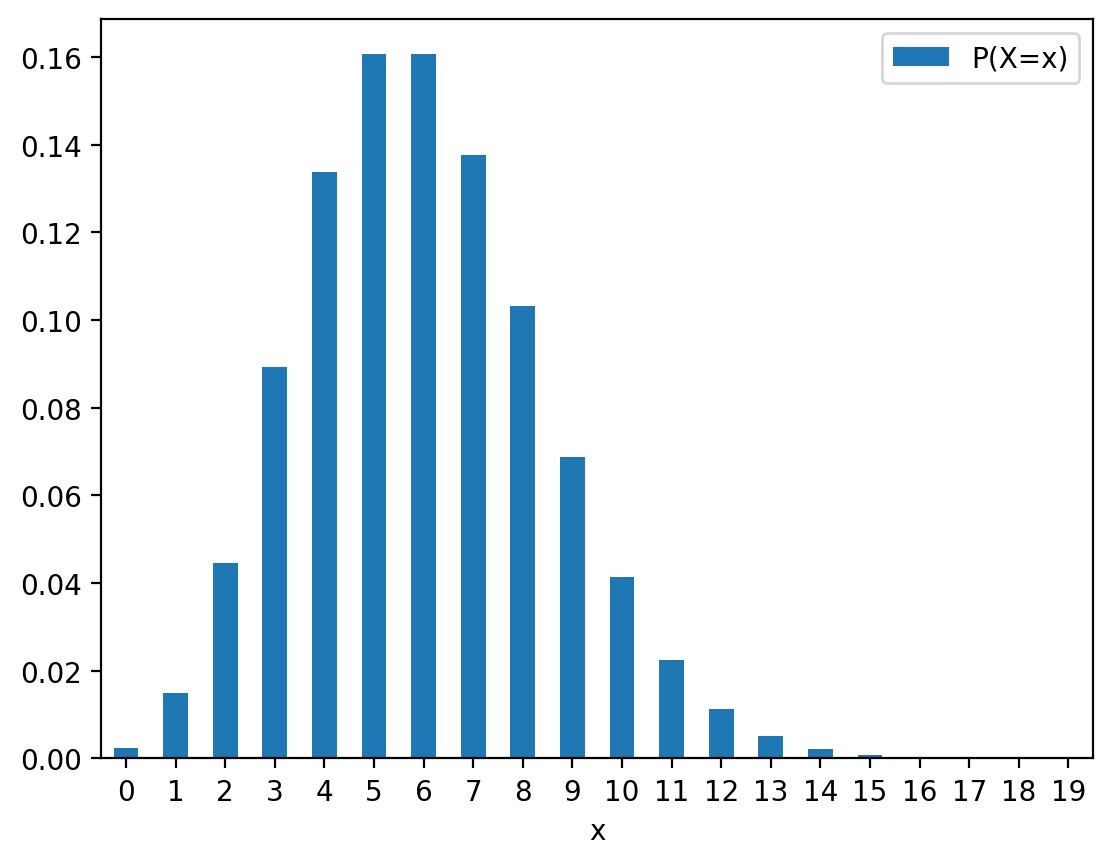

In [286]:
df_prob_poisson.plot(kind='bar', x='x', y='P(X=x)', rot=0)

# Sales Calls Before a Successful Sale
A sales representative makes cold calls to potential customers. Each call has a probability $p$ of resulting in a successful sale. We want to model the number of calls needed before achieving a successful sale.

We can model the number of calls needed before achieving a successful sale using a geometric distribution.

Let $X$ be the number of calls needed before achieving a successful sale. $X$ can take on values $1, 2, 3, \ldots$. The probability mass function (PMF) of a geometric distribution is given by:

$$
p_X(x) = (1-p)^{x-1}p, \quad x \in \{1, 2, 3, \ldots\}.
$$

where $0 < p < 1$ is the probability of a successful sale on each call.



In [287]:
p = 0.3
dist = torch.distributions.Geometric(p)

In [288]:
dist

Geometric(probs: 0.30000001192092896)

In [289]:
dist.support   

IntegerGreaterThan(lower_bound=0)

In [290]:
dist.sample(torch.Size([10]))   

tensor([5., 7., 1., 4., 5., 0., 3., 0., 5., 3.])